In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Load experimental data

In [2]:
experimental = np.loadtxt('../../Netlogo_NLCs-CLL/filtered_fused_9patients.csv', delimiter=",", skiprows=1)
viability_exp = experimental[:,1]
concentration_exp = experimental[:,2]
time_points = experimental[:,0]

##### Load output from simulation

In [3]:
viability_data_node1 = pd.read_csv('../data_output/Parameter_exploration/results/viability_1.csv', delimiter=",")
viability_data_node2 = pd.read_csv('../data_output/Parameter_exploration/results/viability_2.csv', delimiter=",")
viability_data_node3 = pd.read_csv('../data_output/Parameter_exploration/results/viability_3.csv', delimiter=",")
viability_data = pd.concat([viability_data_node1, viability_data_node2, viability_data_node3], axis = 1) 

concentration_data_node1 = pd.read_csv('../data_output/Parameter_exploration/results/concentration_1.csv', delimiter=",")
concentration_data_node2 = pd.read_csv('../data_output/Parameter_exploration/results/concentration_2.csv', delimiter=",")
concentration_data_node3 = pd.read_csv('../data_output/Parameter_exploration/results/concentration_3.csv', delimiter=",")
concentration_data = pd.concat([concentration_data_node1, concentration_data_node2, concentration_data_node3], axis=1)

vals = list([0, 1e-8, 1e-6, 1e-4, 1e-2, 2, 4, 6])
len(vals)

viability_data.shape[1]

input = {'cell_cell_repulsion_strength_cancer': 30, 'speed_cancer': 2,
         'secretion_rate_cytokines_cancer': 1e-1, 'uptake_rate_antiapoptotic_cancer': 1, 
         'transformation_rate_apoptotic_cancer': 8e-5, 'speed_monocytes': 1e-1,
         'uptake_rate_cytokines_monocytes': 1, 'uptake_rate_stress_monocytes': 1,
         'phagocytosis_rate_apoptotic_monocytes': 25e-4, 'phagocytosis_rate_dead_monocytes': 25e-4,
         'transformation_rate_macrophages_monocytes': 2e-12, 'transformation_rate_NLCs_monocytes': 3e-15,
         'speed_macrophages': 1e-1, 'uptake_rate_cytokines_macrophages': 1, 'uptake_rate_stress_macrophages': 1,
         'attack_rate_cancer_macrophages': 5e-2, 'damage_rate_macrophages': 10e-3, 'phagocytosis_rate_apoptotic_macrophages': 92e-4,
         'phagocytosis_rate_dead_macrophages': 92e-4, 'transformation_rate_NLCs_macrophages': 3e-16,
         'cell_cell_adhesion_strength_NLCs': 1, 'attachment_rate_NLCs': 0.001, 'detachment_rate_NLCs': 0.0001, "speed_NLCs": 1e-1,
         'secretion_rate_antiapoptotic_NLCs': 1, 'uptake_rate_stress_NLCs': 1, 'phagocytosis_rate_apoptotic_NLCs': 4e-4,
         'phagocytosis_rate_dead_NLCs': 4e-4, 'speed_apoptotic': 2, 'secretion_rate_cytokines_apoptotic': 1e-3,
         'secretion_rate_stress_apoptotic': 1e-1, 'transformation_rate_dead_apoptotic': 5e-5, 'secretion_rate_stress_dead': 1}

param_names = list(input.keys())

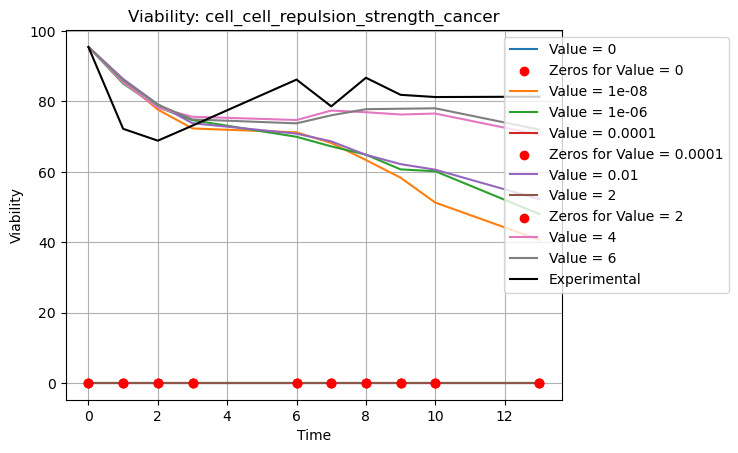

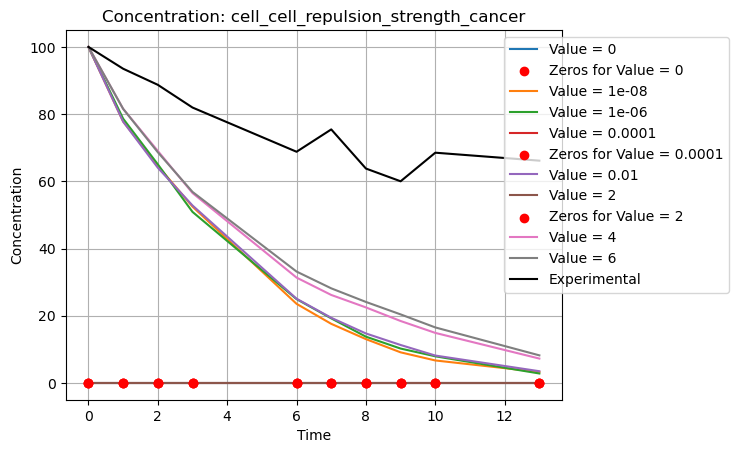

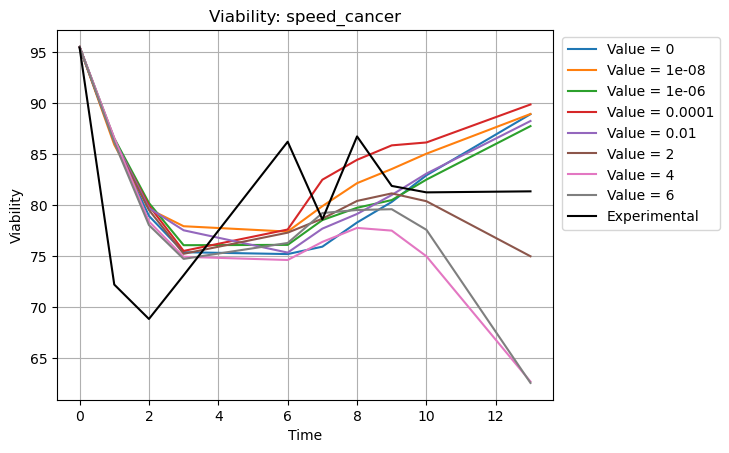

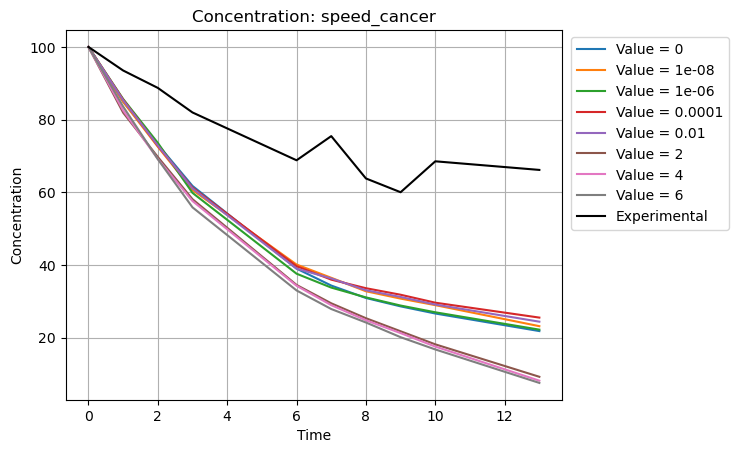

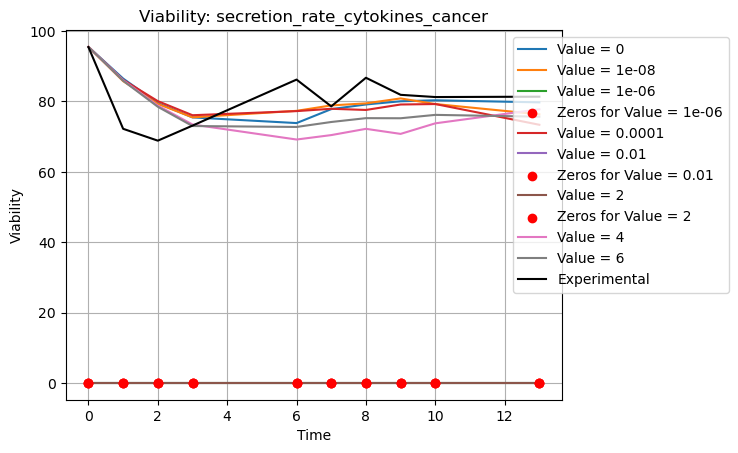

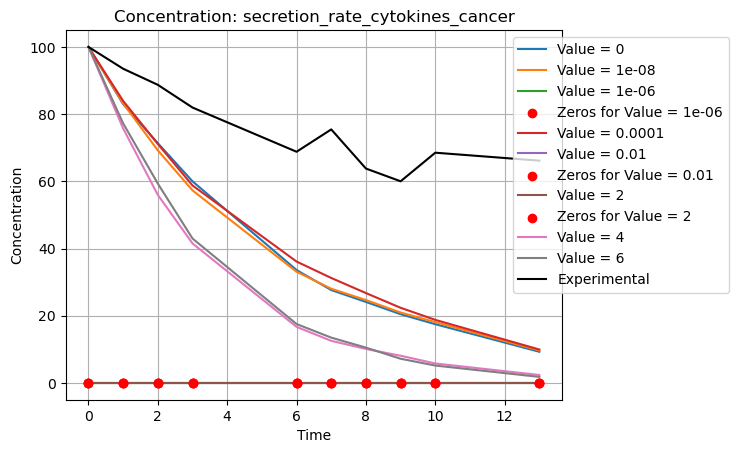

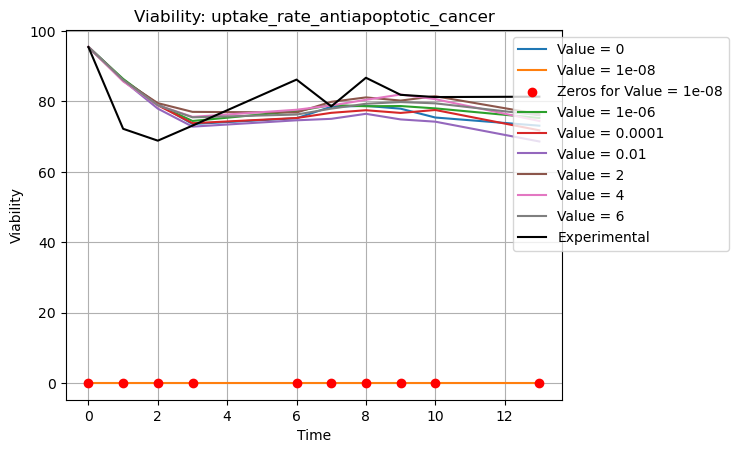

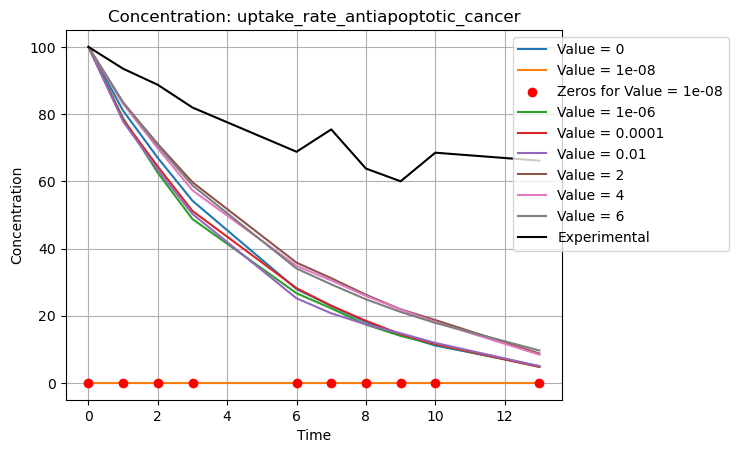

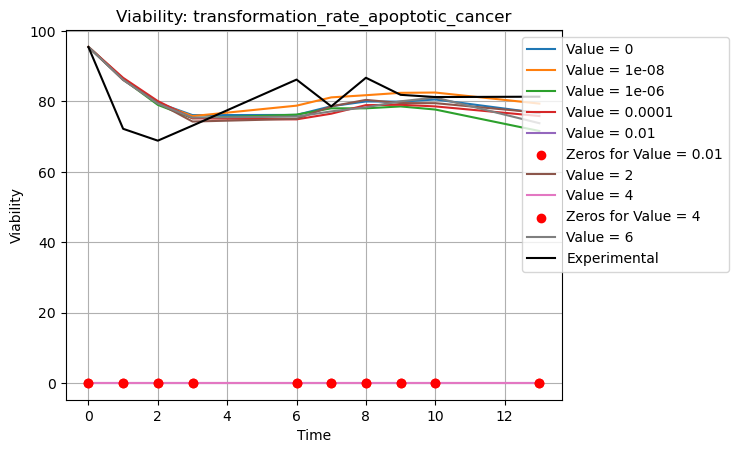

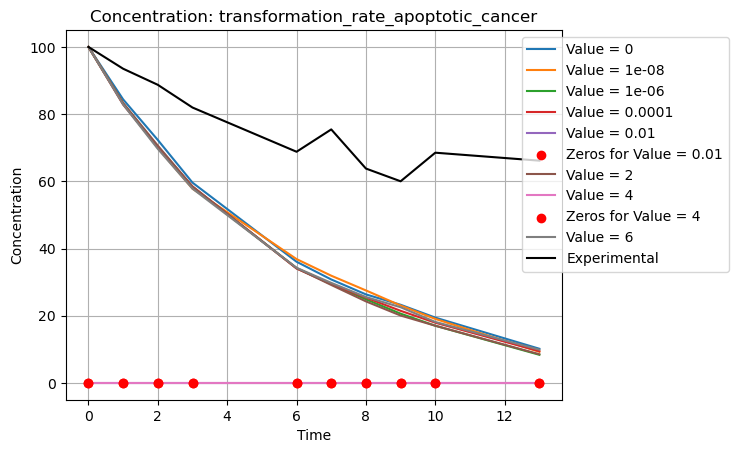

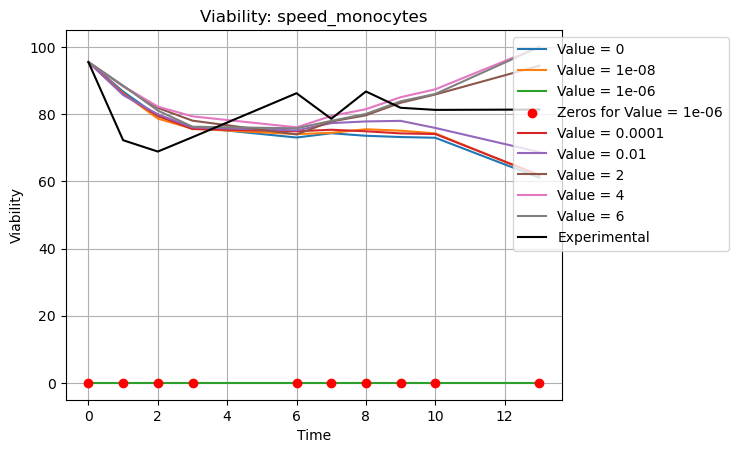

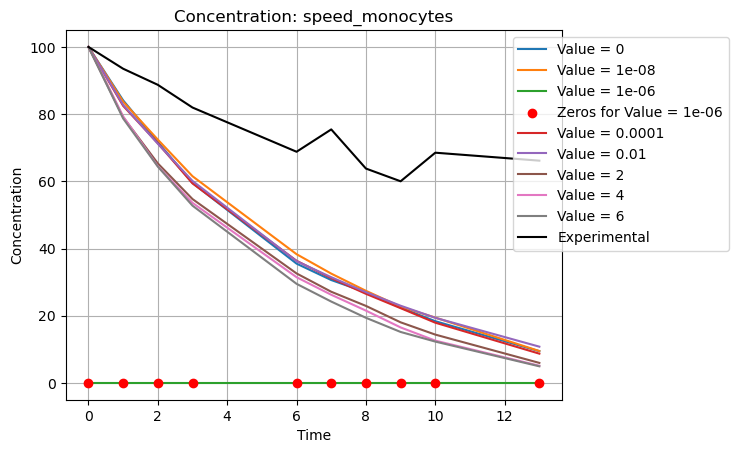

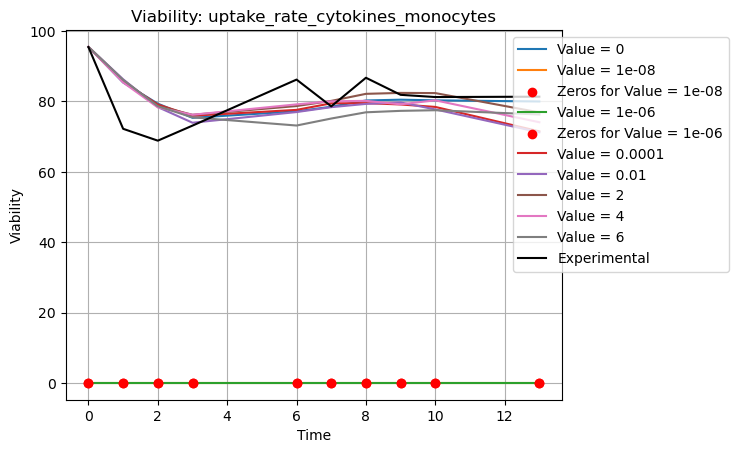

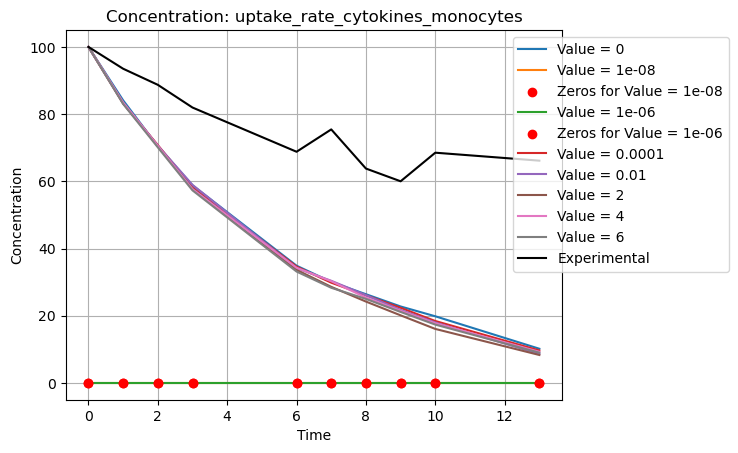

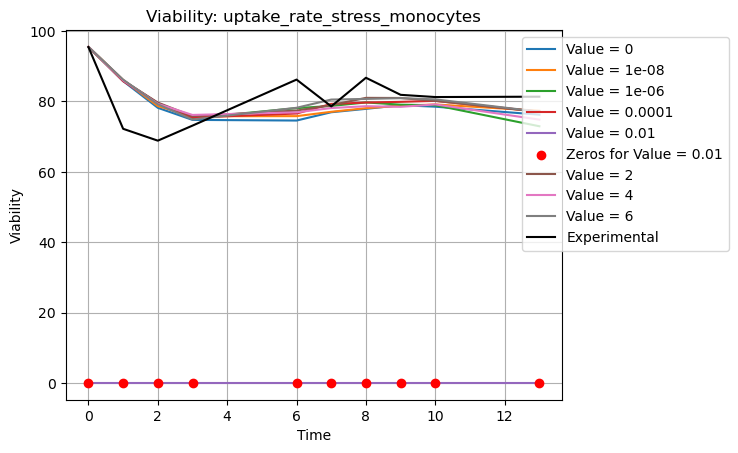

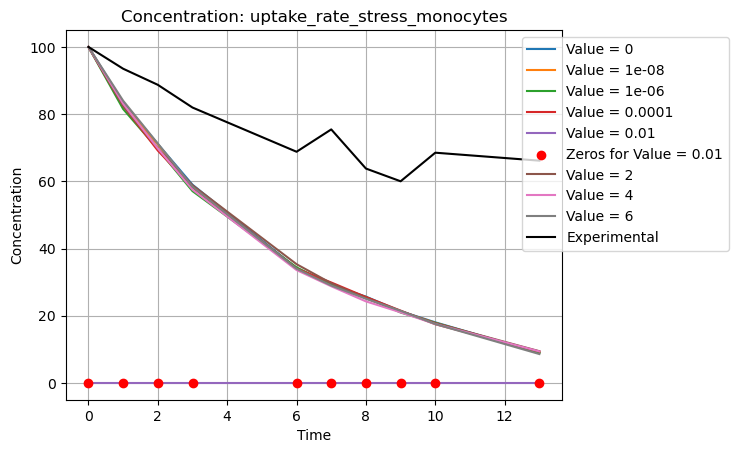

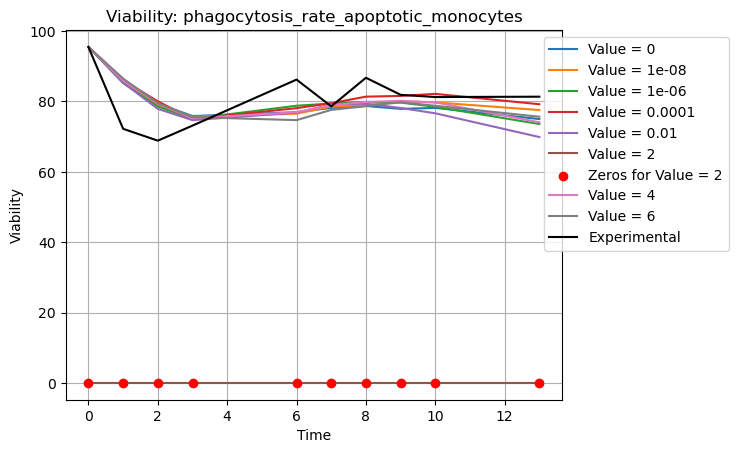

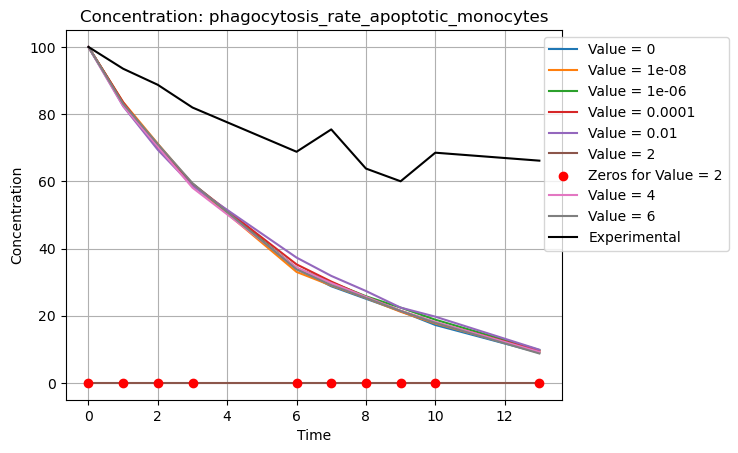

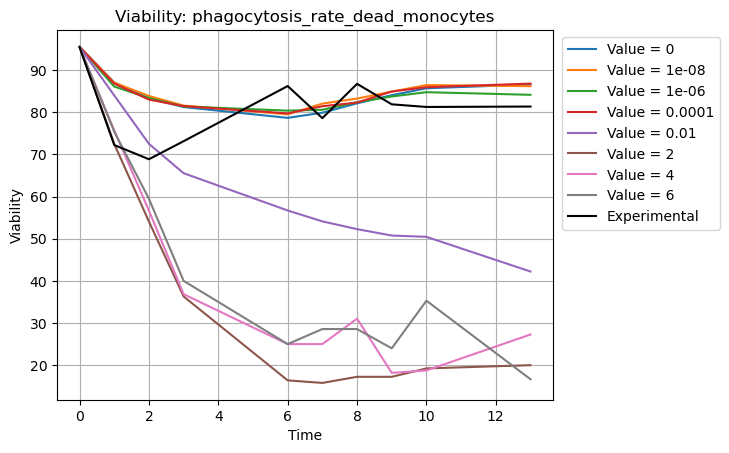

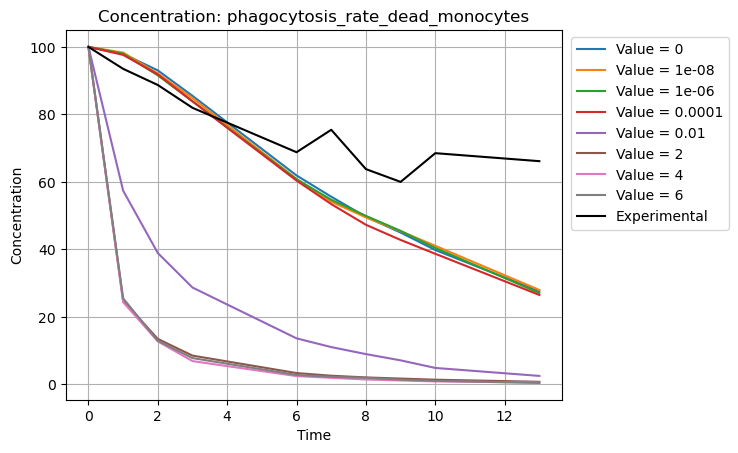

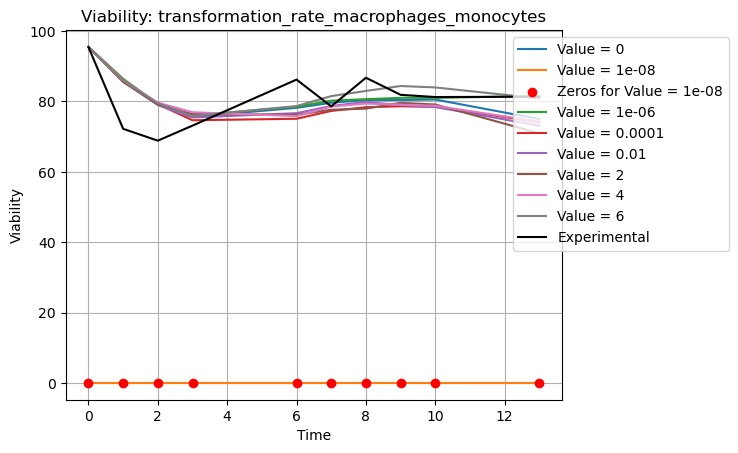

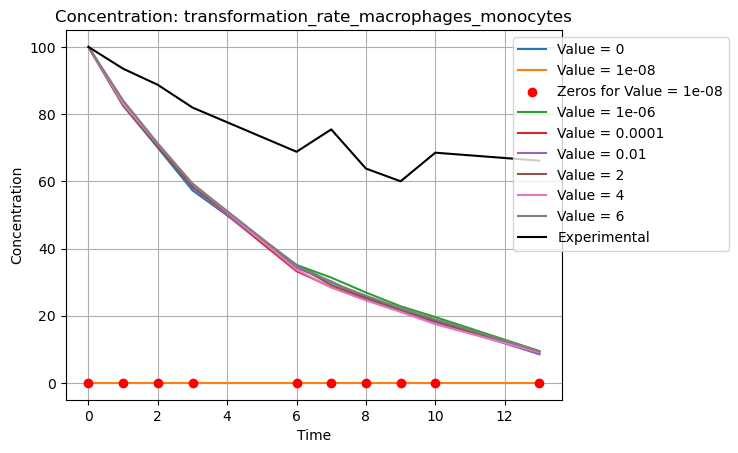

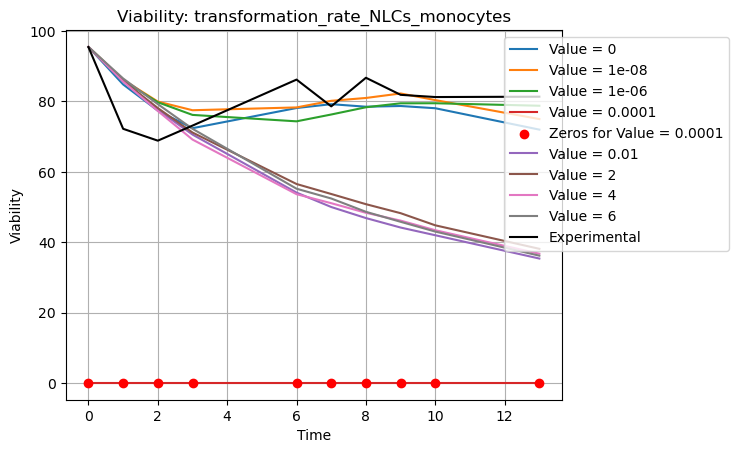

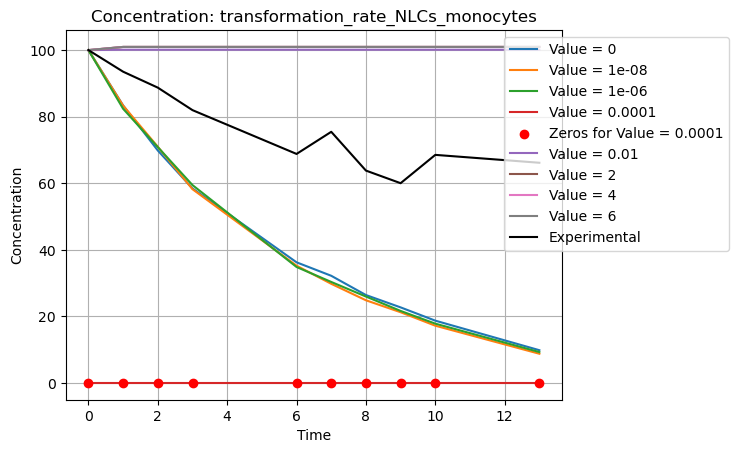

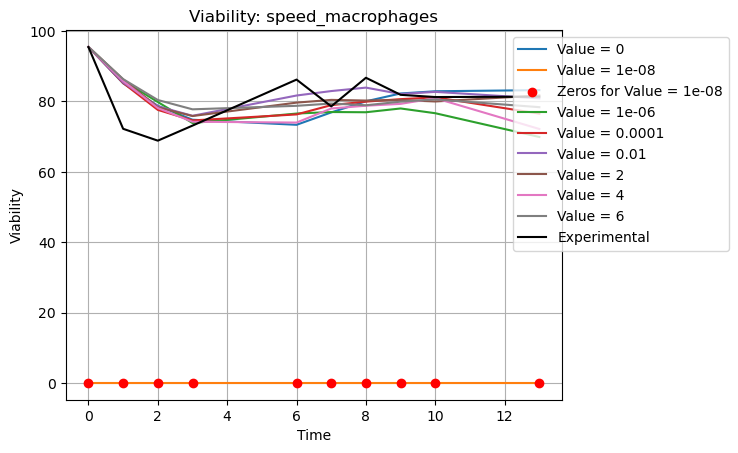

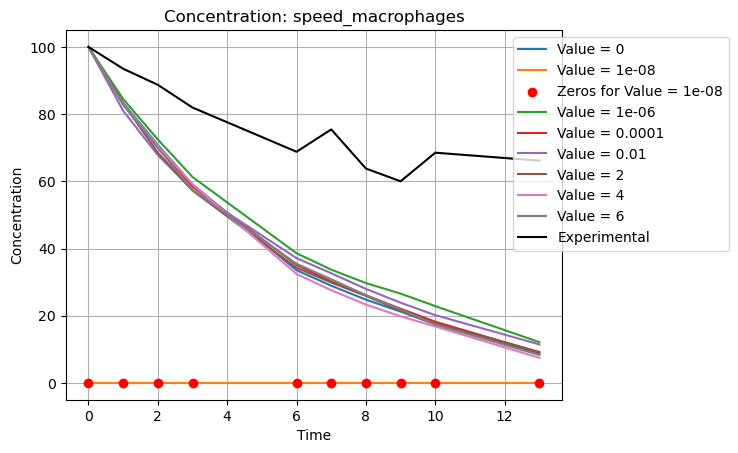

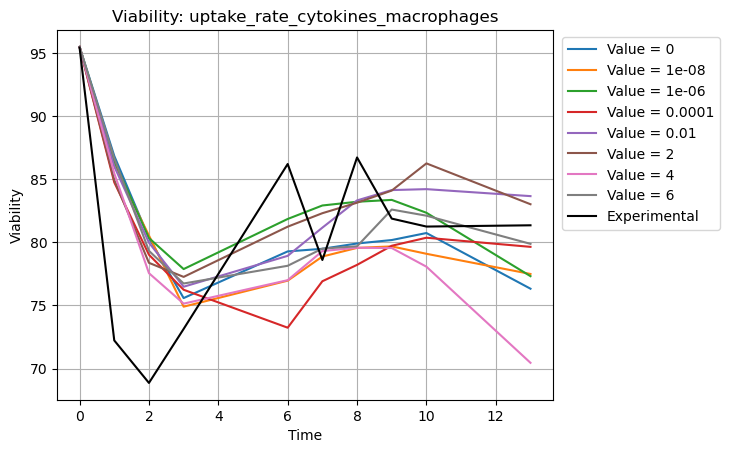

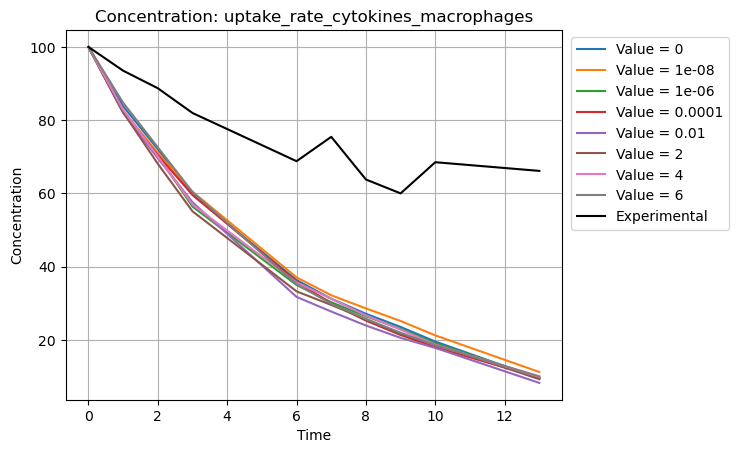

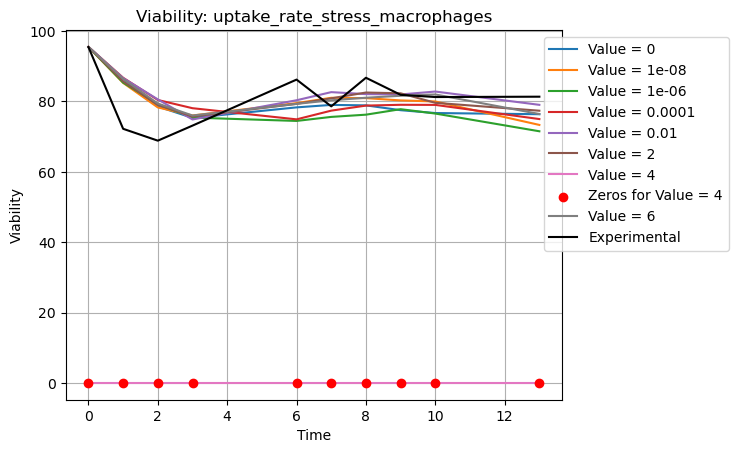

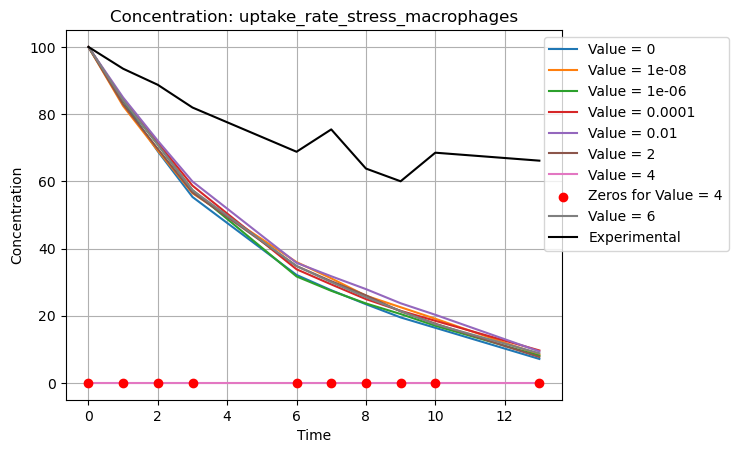

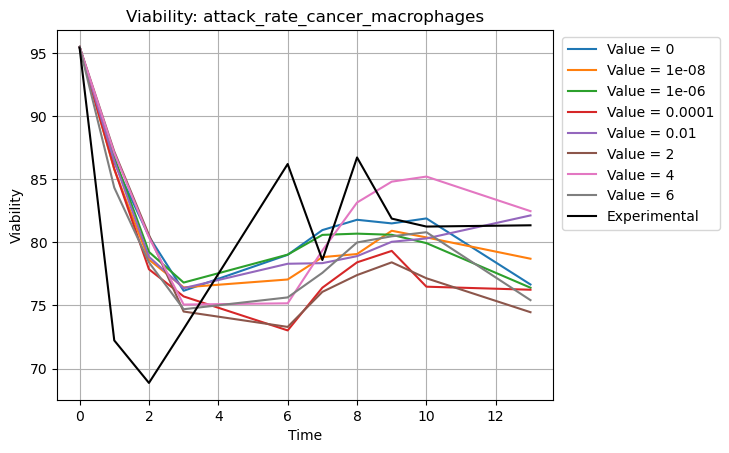

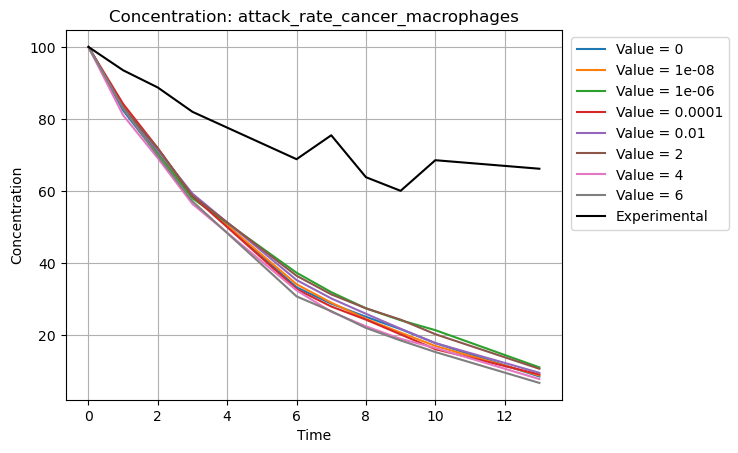

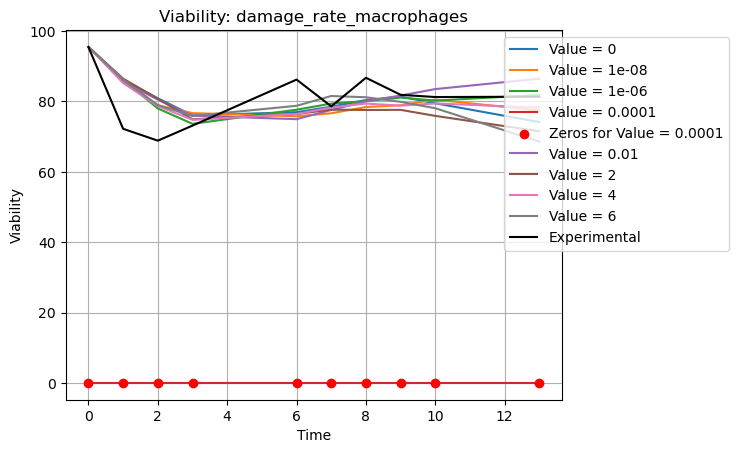

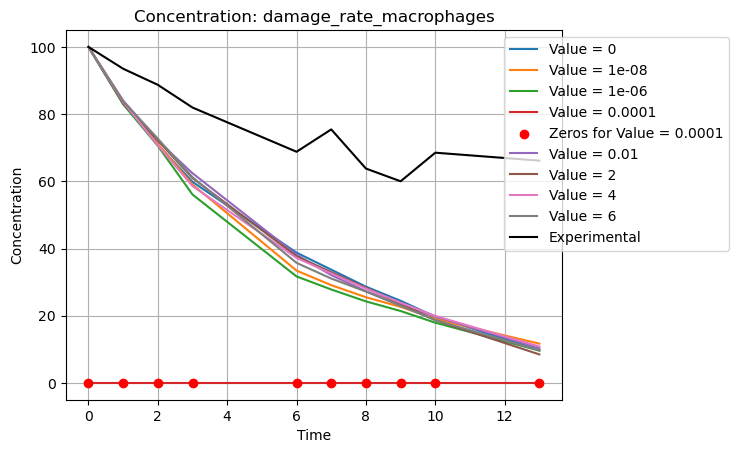

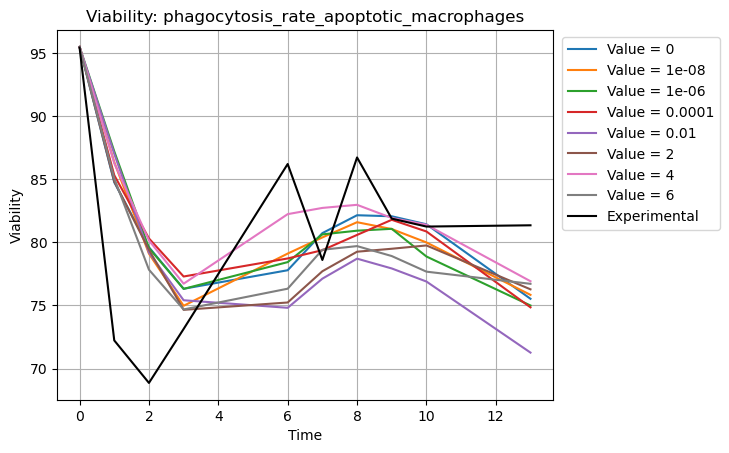

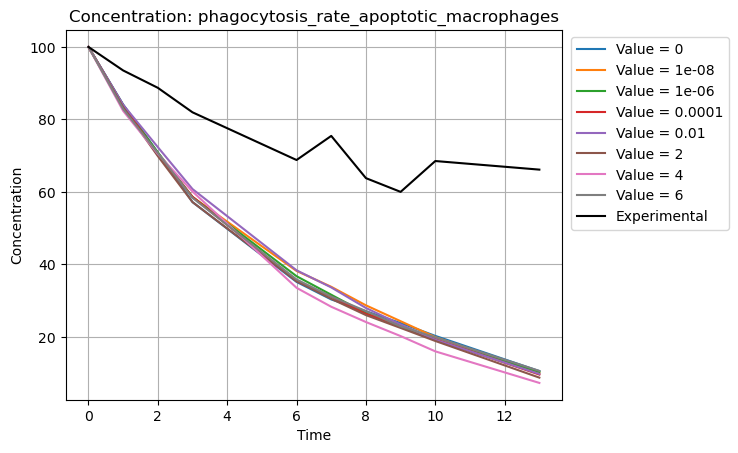

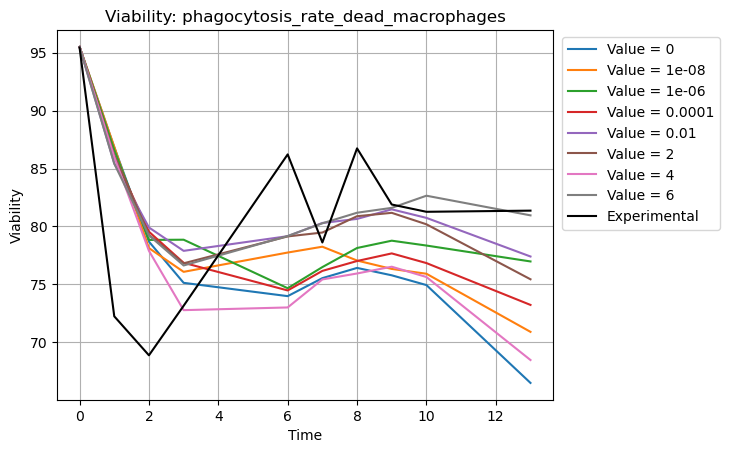

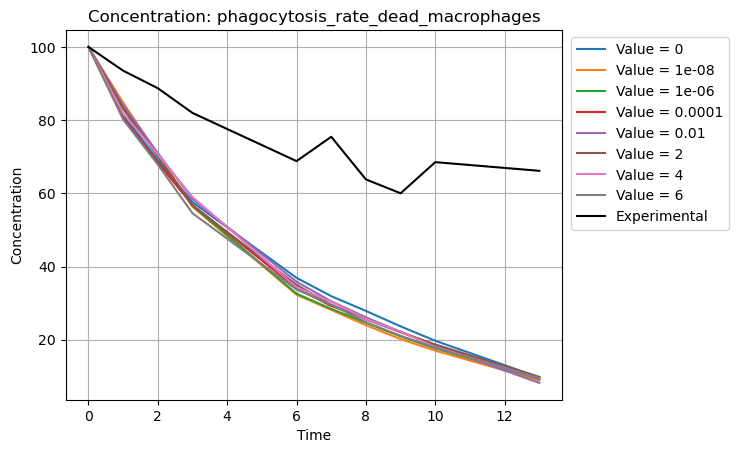

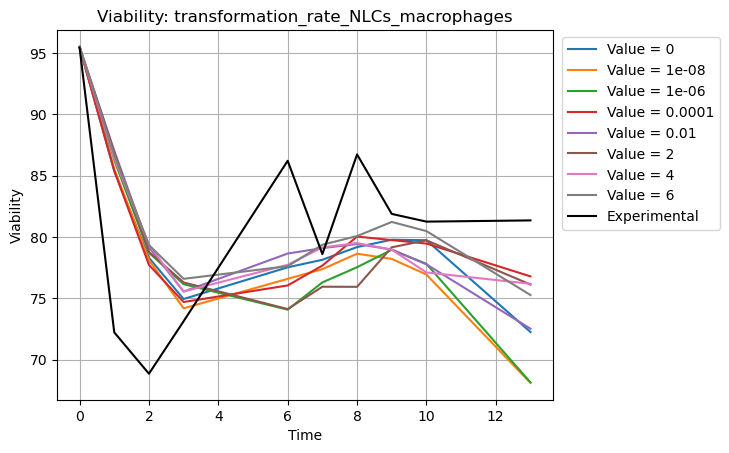

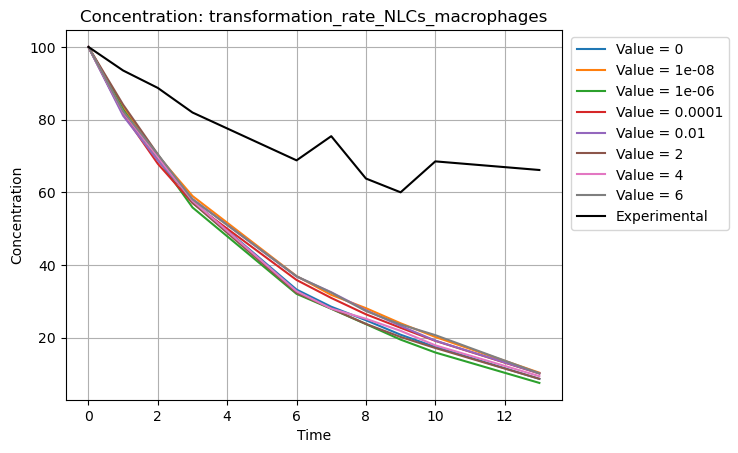

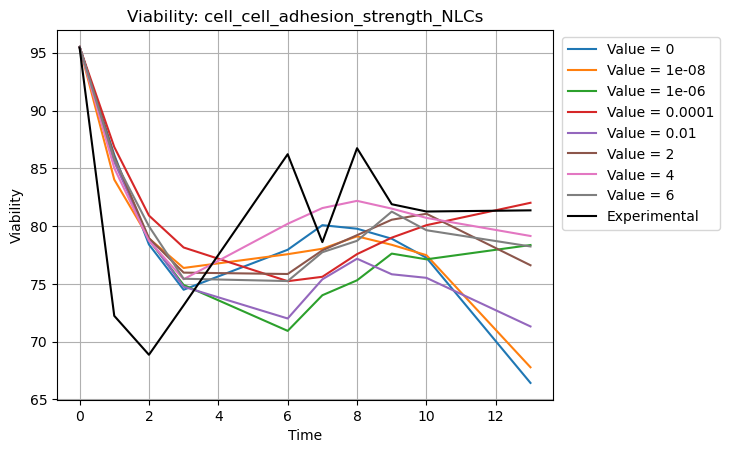

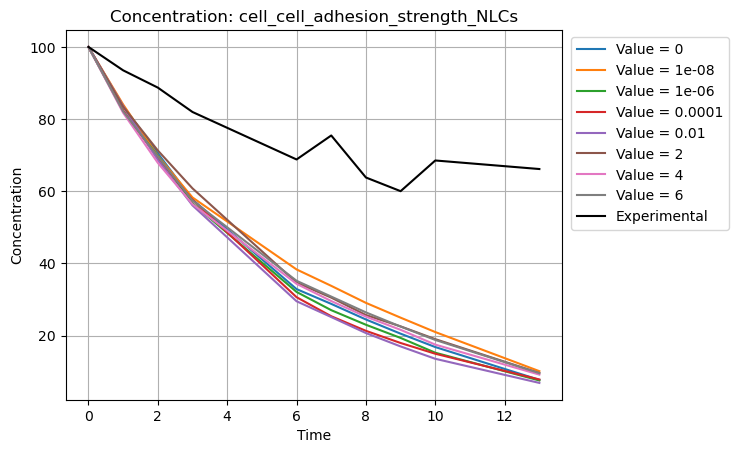

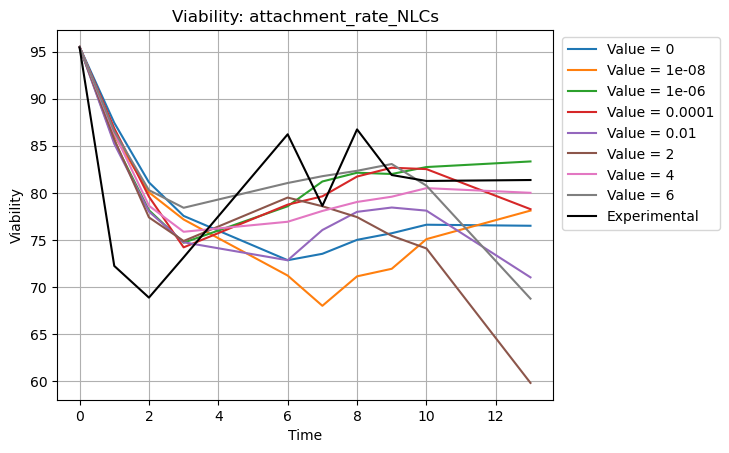

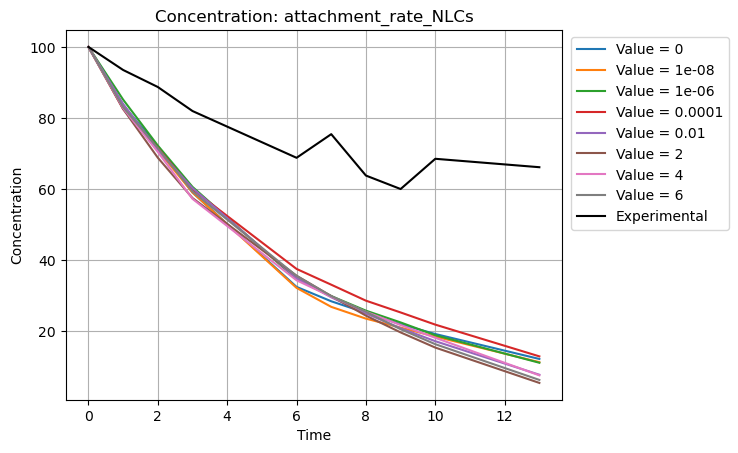

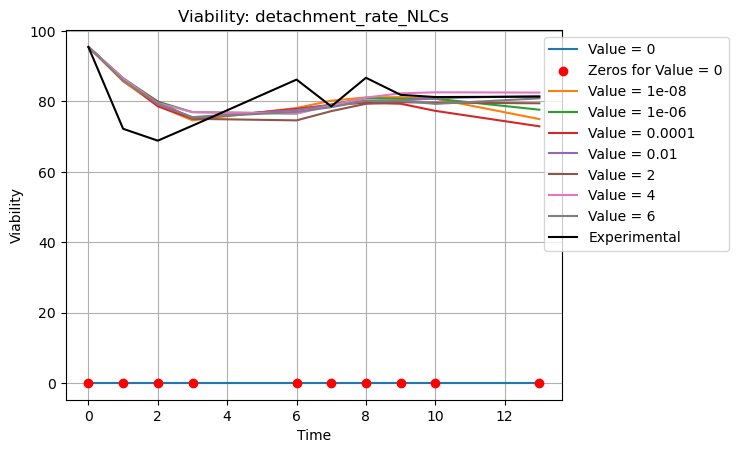

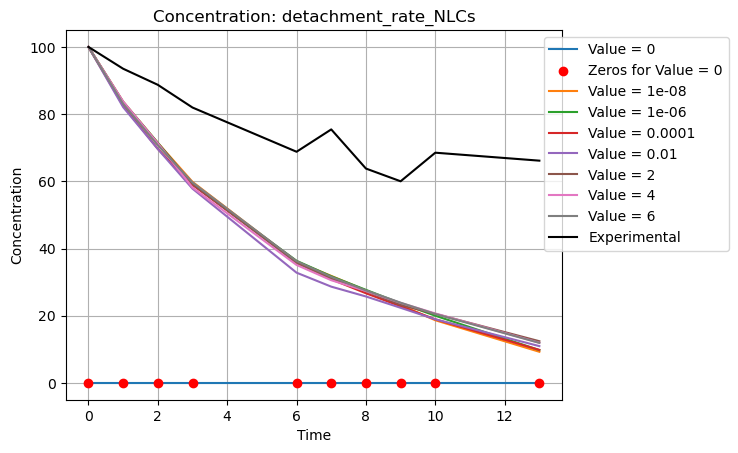

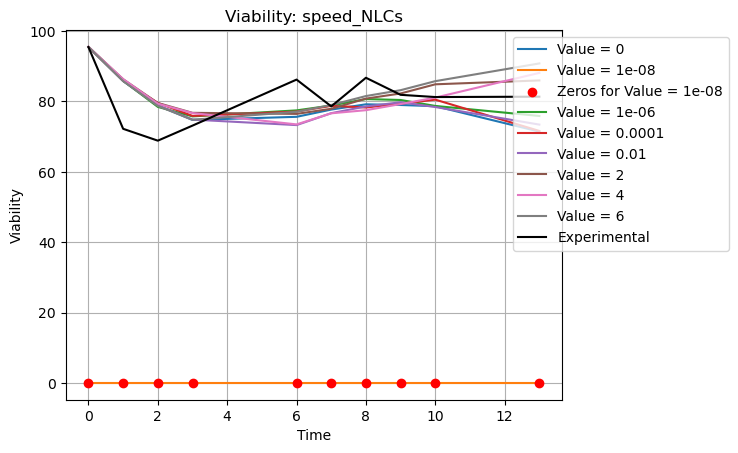

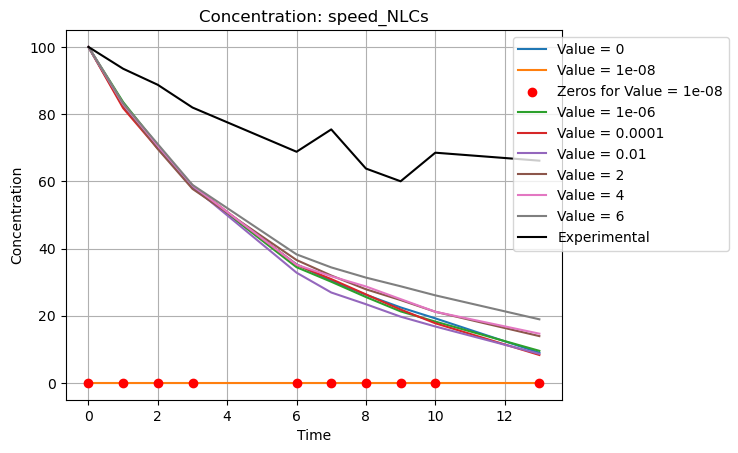

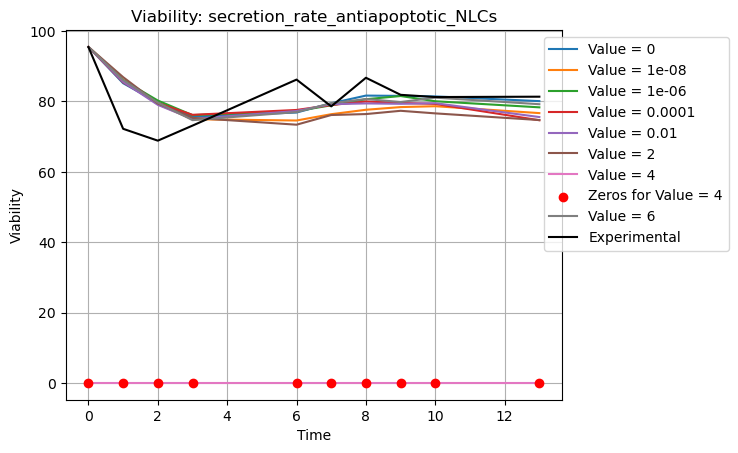

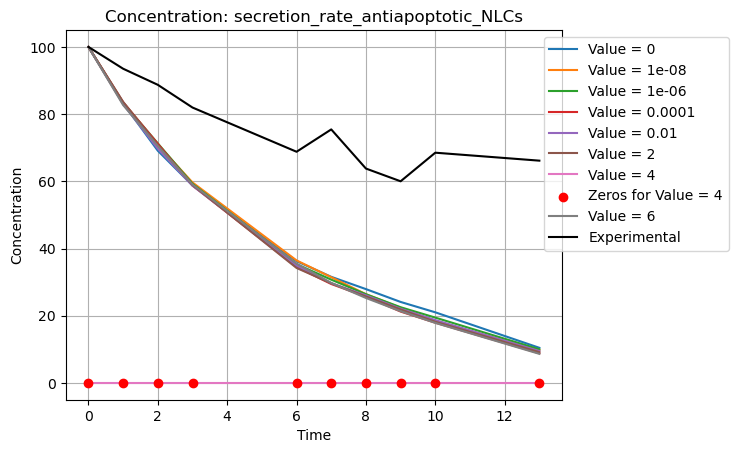

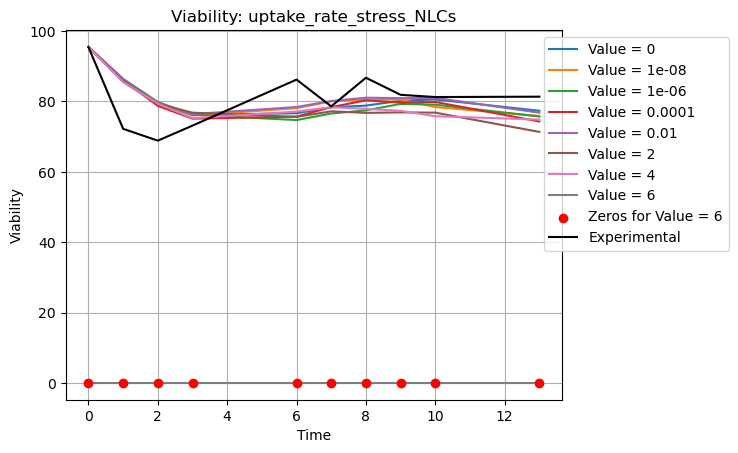

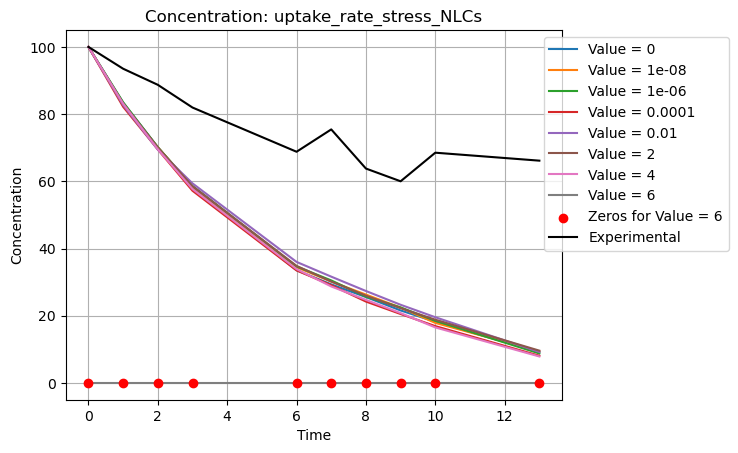

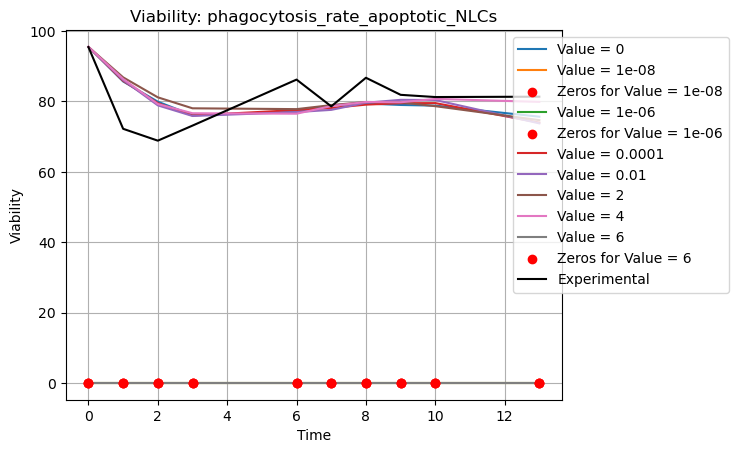

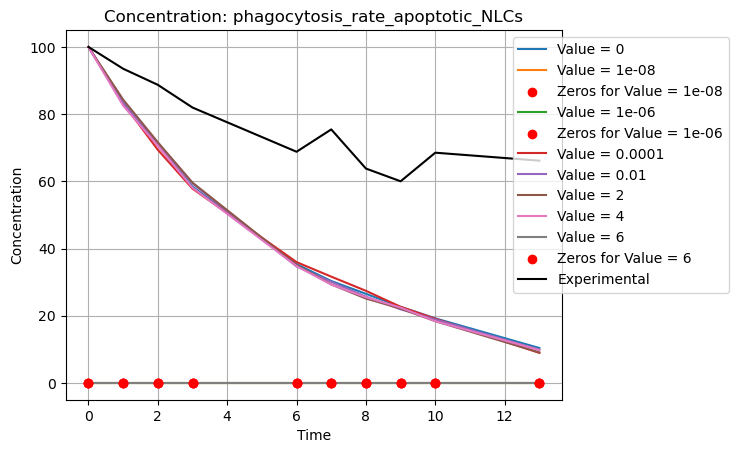

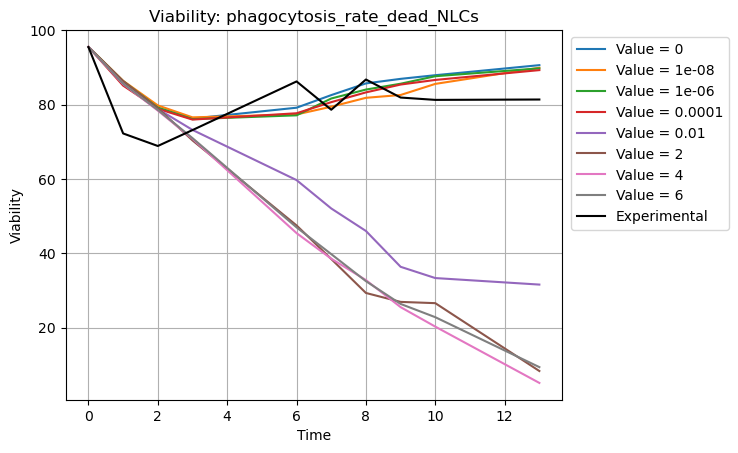

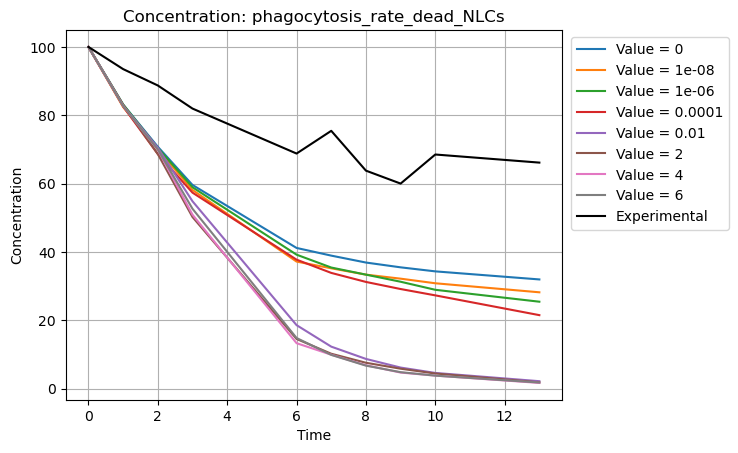

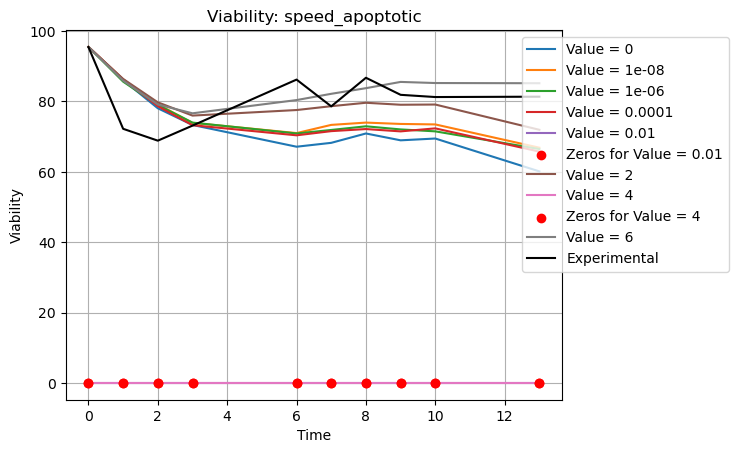

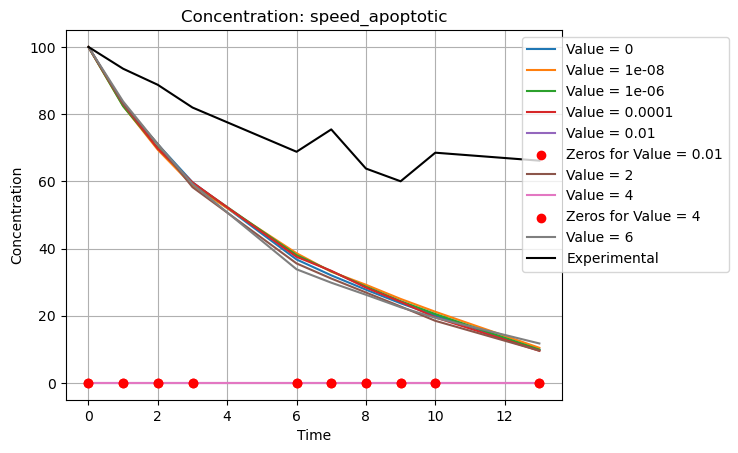

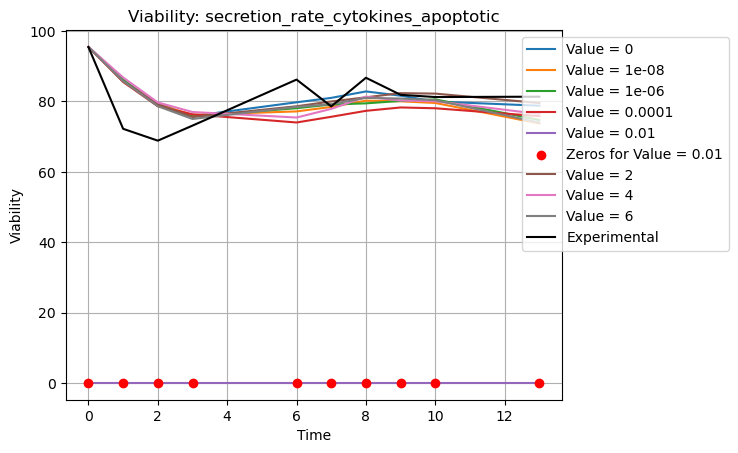

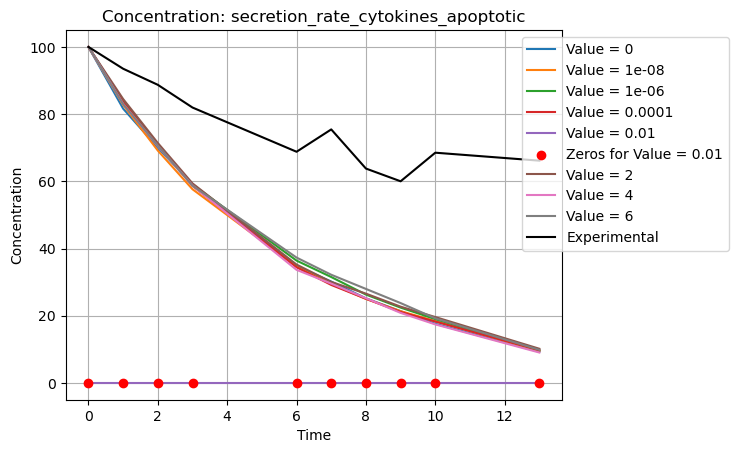

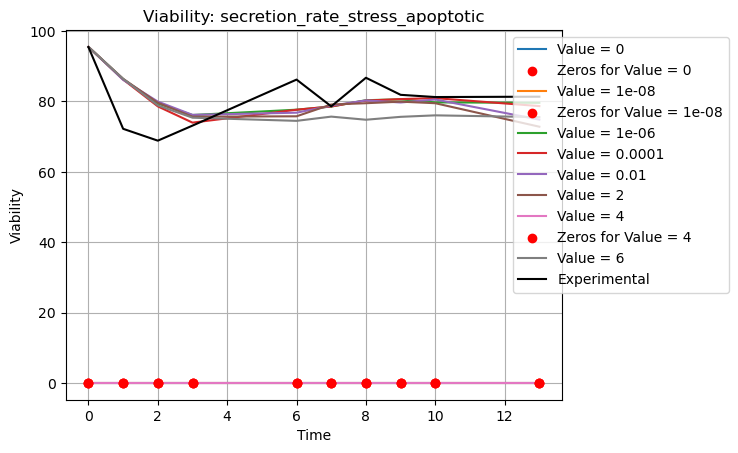

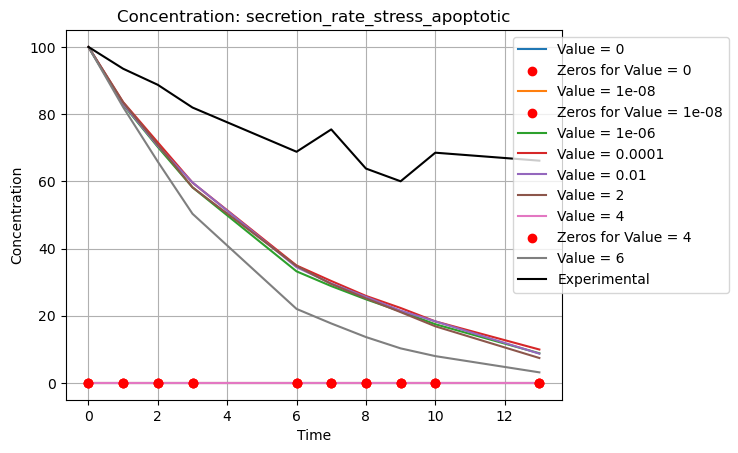

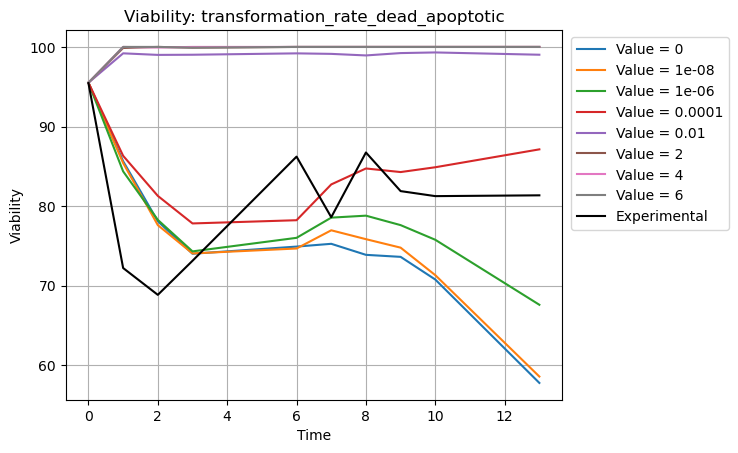

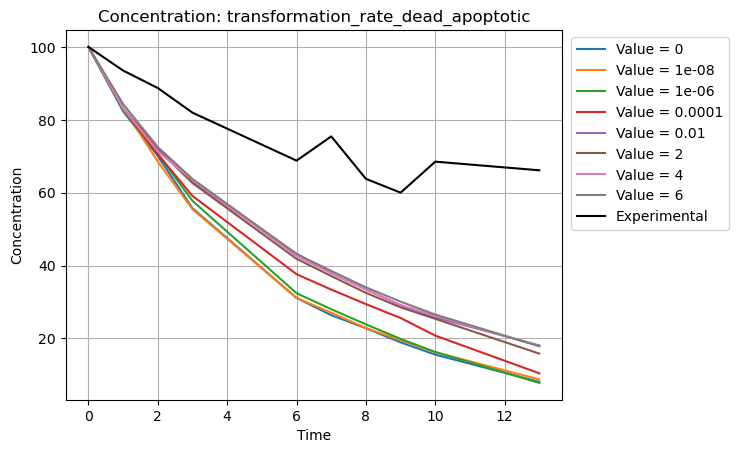

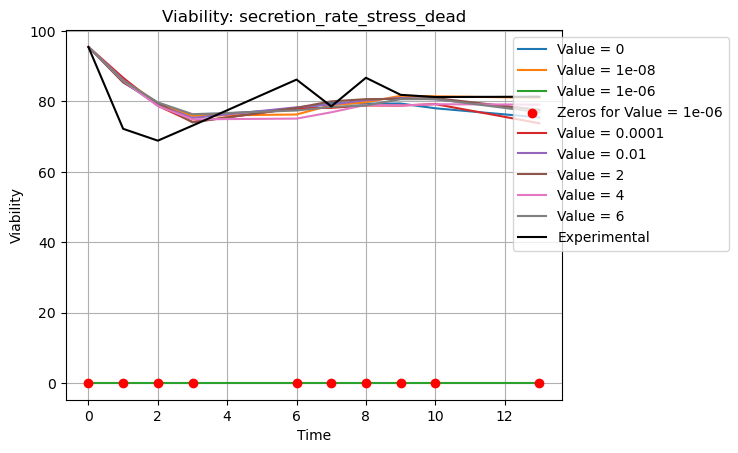

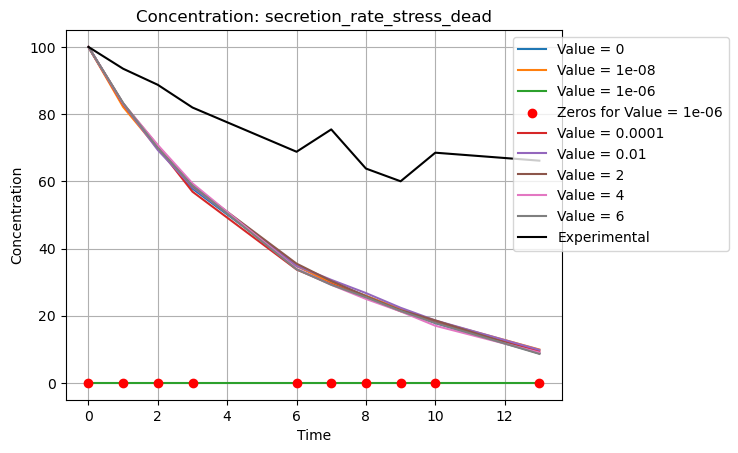

In [10]:
contador = 0
for k in range(0, viability_data.shape[1], len(vals)):
    
    viability = viability_data.iloc[:,k:k+ len(vals)]
    concentration = concentration_data.iloc[:,k:k+ len(vals)]

    ###Viability
    for i in range(viability.shape[1]): # Iterate over each column of the matrix
        plt.plot(time_points, viability.iloc[:, i], label=f'Value = {vals[i]}')

        # Highlight zeros in viability
        zero_indices = viability.iloc[:, i] == 0
        if zero_indices.any():  # Check if there are any zeros
            plt.scatter(time_points[zero_indices], viability.iloc[:, i][zero_indices],
                        color='red', label=f'Zeros for Value = {vals[i]}', zorder=5)

    plt.plot(time_points, viability_exp, label='Experimental', color = 'black')
    plt.xlabel('Time')
    plt.ylabel('Viability')
    plt.title(f'Viability: {param_names[contador]}')
    plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1))

    plt.grid(True)
    plt.show()

    ###Concentration
    for i in range(concentration.shape[1]):
        plt.plot(time_points, concentration.iloc[:, i], label=f'Value = {vals[i]}')

        # Highlight zeros in concentration
        zero_indices = concentration.iloc[:, i] == 0
        if zero_indices.any():  # Check if there are any zeros
            plt.scatter(time_points[zero_indices], concentration.iloc[:, i][zero_indices],
                        color='red', label=f'Zeros for Value = {vals[i]}', zorder=5)
            
    plt.plot(time_points, concentration_exp, label='Experimental', color = 'black')
    plt.xlabel('Time')
    plt.ylabel('Concentration')
    plt.title(f'Concentration: {param_names[contador]}')
    plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1))

    plt.grid(True)
    plt.show()
    
    contador = contador + 1